In [103]:
import kagglehub
import shutil
import os
# Download latest version
path = kagglehub.dataset_download("abecklas/fifa-world-cup")

destination = os.path.join(os.getcwd(), "soccer_dataset")

# Copy dataset files to local folder
shutil.copytree(path, destination, dirs_exist_ok=True)

print(f"Dataset saved locally in: {destination}")

Dataset saved locally in: /Users/tommykornfeld/Documents/projects/m50/soccer_dataset


In [ ]:
import kagglehub
import kagglehub
import shutil
import os
# Download latest version
path = kagglehub.dataset_download("martj42/international-football-results-from-1872-to-2017")

destination = os.path.join(os.getcwd(), "soccer_dataset")

# Copy dataset files to local folder
shutil.copytree(path, destination, dirs_exist_ok=True)

print(f"Dataset saved locally in: {destination}")

Dataset saved locally in: /Users/tommykornfeld/Documents/projects/m50/soccer_dataset


In [212]:
import math
from collections import defaultdict

class TeamElo:
    def __init__(self, teams_list, initial_rating=1500, k=32):
        self.initial_rating = initial_rating
        self.k = k
        self.ratings = {}
        for team in teams_list:
            self.ratings[team] = initial_rating

    def expected(self, rating_a, rating_b):
        return 1 / (1 + 10 ** ((rating_b - rating_a) / 400))

    def update(self, team_a, team_b, score_a, score_b):
        Ra = self.ratings[team_a]
        Rb = self.ratings[team_b]

        # actual outcomes (0, 0.5, 1)
        if score_a == score_b:
            Sa, Sb = 0.5, 0.5
        else:
            Sa = 1.0 if score_a > score_b else 0.0
            Sb = 1.0 - Sa

        Ea = self.expected(Ra, Rb)
        Eb = 1 - Ea

        # apply update
        new_Ra = Ra + self.k * (Sa - Ea)
        new_Rb = Rb + self.k * (Sb - Eb)

        self.ratings[team_a] = new_Ra
        self.ratings[team_b] = new_Rb

        return new_Ra, new_Rb

    def get(self, team):
        return self.ratings[team]


In [213]:
import pandas as pd
import sqlite3
import numpy as np

db_path = "soccer_dataset/results.csv"

df = pd.read_csv(db_path)


In [214]:
df_econ = pd.read_csv('soccer_dataset/gdp-per-capita-worldbank.csv')


In [215]:
df=df.dropna(subset=["home_team", "away_team", "home_score", "away_score", 'city'])

In [216]:
COUNTRY_CAPITAL_TIMEZONES = {
    "Afghanistan": ("Kabul", "Asia/Kabul"),
    "Albania": ("Tirana", "Europe/Tirane"),
    "Algeria": ("Algiers", "Africa/Algiers"),
    "Andorra": ("Andorra la Vella", "Europe/Andorra"),
    "Angola": ("Luanda", "Africa/Luanda"),
    "Antigua and Barbuda": ("Saint John's", "America/Antigua"),
    "Argentina": ("Buenos Aires", "America/Argentina/Buenos_Aires"),
    "Armenia": ("Yerevan", "Asia/Yerevan"),
    "Australia": ("Canberra", "Australia/Sydney"),     # ACT uses Sydney zone
    "Austria": ("Vienna", "Europe/Vienna"),
    "Azerbaijan": ("Baku", "Asia/Baku"),
    "Bahamas": ("Nassau", "America/Nassau"),
    "Bahrain": ("Manama", "Asia/Bahrain"),
    "Bangladesh": ("Dhaka", "Asia/Dhaka"),
    "Barbados": ("Bridgetown", "America/Barbados"),
    "Belarus": ("Minsk", "Europe/Minsk"),
    "Belgium": ("Brussels", "Europe/Brussels"),
    "Belize": ("Belmopan", "America/Belize"),
    "Benin": ("Porto-Novo", "Africa/Porto-Novo"),
    "Bhutan": ("Thimphu", "Asia/Thimphu"),
    "Bolivia": ("Sucre", "America/La_Paz"),  # La Paz timezone used
    "Bosnia and Herzegovina": ("Sarajevo", "Europe/Sarajevo"),
    "Botswana": ("Gaborone", "Africa/Gaborone"),
    "Brazil": ("Brasília", "America/Sao_Paulo"),
    "Brunei": ("Bandar Seri Begawan", "Asia/Brunei"),
    "Bulgaria": ("Sofia", "Europe/Sofia"),
    "Burkina Faso": ("Ouagadougou", "Africa/Ouagadougou"),
    "Burundi": ("Gitega", "Africa/Bujumbura"),
    "Cabo Verde": ("Praia", "Atlantic/Cape_Verde"),
    "Cambodia": ("Phnom Penh", "Asia/Phnom_Penh"),
    "Cameroon": ("Yaoundé", "Africa/Douala"),
    "Canada": ("Ottawa", "America/Toronto"),
    "Central African Republic": ("Bangui", "Africa/Bangui"),
    "Chad": ("N'Djamena", "Africa/Ndjamena"),
    "Chile": ("Santiago", "America/Santiago"),
    "China": ("Beijing", "Asia/Shanghai"),
    "Colombia": ("Bogotá", "America/Bogota"),
    "Comoros": ("Moroni", "Indian/Comoro"),
    "Congo (Republic of the)": ("Brazzaville", "Africa/Brazzaville"),
    "Congo (Democratic Republic of the)": ("Kinshasa", "Africa/Kinshasa"),
    "Costa Rica": ("San José", "America/Costa_Rica"),
    "Côte d'Ivoire": ("Yamoussoukro", "Africa/Abidjan"),
    "Croatia": ("Zagreb", "Europe/Zagreb"),
    "Cuba": ("Havana", "America/Havana"),
    "Cyprus": ("Nicosia", "Asia/Nicosia"),
    "Czech Republic": ("Prague", "Europe/Prague"),
    "Denmark": ("Copenhagen", "Europe/Copenhagen"),
    "Djibouti": ("Djibouti", "Africa/Djibouti"),
    "Dominica": ("Roseau", "America/Dominica"),
    "Dominican Republic": ("Santo Domingo", "America/Santo_Domingo"),
    "Ecuador": ("Quito", "America/Guayaquil"),
    "Egypt": ("Cairo", "Africa/Cairo"),
    "El Salvador": ("San Salvador", "America/El_Salvador"),
    "Equatorial Guinea": ("Malabo", "Africa/Malabo"),
    "Eritrea": ("Asmara", "Africa/Asmara"),
    "Estonia": ("Tallinn", "Europe/Tallinn"),
    "Eswatini": ("Mbabane", "Africa/Mbabane"),
    "Ethiopia": ("Addis Ababa", "Africa/Addis_Ababa"),
    "Fiji": ("Suva", "Pacific/Fiji"),
    "Finland": ("Helsinki", "Europe/Helsinki"),
    "France": ("Paris", "Europe/Paris"),
    "Gabon": ("Libreville", "Africa/Libreville"),
    "Gambia": ("Banjul", "Africa/Banjul"),
    "Georgia": ("Tbilisi", "Asia/Tbilisi"),
    "Germany": ("Berlin", "Europe/Berlin"),
    "Ghana": ("Accra", "Africa/Accra"),
    "Greece": ("Athens", "Europe/Athens"),
    "Grenada": ("Saint George's", "America/Grenada"),
    "Guatemala": ("Guatemala City", "America/Guatemala"),
    "Guinea": ("Conakry", "Africa/Conakry"),
    "Guinea-Bissau": ("Bissau", "Africa/Bissau"),
    "Guyana": ("Georgetown", "America/Guyana"),
    "Haiti": ("Port-au-Prince", "America/Port-au-Prince"),
    "Honduras": ("Tegucigalpa", "America/Tegucigalpa"),
    "Hungary": ("Budapest", "Europe/Budapest"),
    "Iceland": ("Reykjavík", "Atlantic/Reykjavik"),
    "India": ("New Delhi", "Asia/Kolkata"),
    "Indonesia": ("Jakarta", "Asia/Jakarta"),
    "Iran": ("Tehran", "Asia/Tehran"),
    "Iraq": ("Baghdad", "Asia/Baghdad"),
    "Ireland": ("Dublin", "Europe/Dublin"),
    "Israel": ("Jerusalem", "Asia/Jerusalem"),
    "Italy": ("Rome", "Europe/Rome"),
    "Jamaica": ("Kingston", "America/Jamaica"),
    "Japan": ("Tokyo", "Asia/Tokyo"),
    "Jordan": ("Amman", "Asia/Amman"),
    "Kazakhstan": ("Astana", "Asia/Almaty"),
    "Kenya": ("Nairobi", "Africa/Nairobi"),
    "Kiribati": ("South Tarawa", "Pacific/Tarawa"),
    "Kuwait": ("Kuwait City", "Asia/Kuwait"),
    "Kyrgyzstan": ("Bishkek", "Asia/Bishkek"),
    "Laos": ("Vientiane", "Asia/Vientiane"),
    "Latvia": ("Riga", "Europe/Riga"),
    "Lebanon": ("Beirut", "Asia/Beirut"),
    "Lesotho": ("Maseru", "Africa/Maseru"),
    "Liberia": ("Monrovia", "Africa/Monrovia"),
    "Libya": ("Tripoli", "Africa/Tripoli"),
    "Liechtenstein": ("Vaduz", "Europe/Vaduz"),
    "Lithuania": ("Vilnius", "Europe/Vilnius"),
    "Luxembourg": ("Luxembourg", "Europe/Luxembourg"),
    "Madagascar": ("Antananarivo", "Indian/Antananarivo"),
    "Malawi": ("Lilongwe", "Africa/Blantyre"),
    "Malaysia": ("Kuala Lumpur", "Asia/Kuala_Lumpur"),
    "Maldives": ("Malé", "Indian/Maldives"),
    "Mali": ("Bamako", "Africa/Bamako"),
    "Malta": ("Valletta", "Europe/Malta"),
    "Marshall Islands": ("Majuro", "Pacific/Majuro"),
    "Mauritania": ("Nouakchott", "Africa/Nouakchott"),
    "Mauritius": ("Port Louis", "Indian/Mauritius"),
    "Mexico": ("Mexico City", "America/Mexico_City"),
    "Micronesia": ("Palikir", "Pacific/Pohnpei"),
    "Moldova": ("Chișinău", "Europe/Chisinau"),
    "Monaco": ("Monaco", "Europe/Monaco"),
    "Mongolia": ("Ulaanbaatar", "Asia/Ulaanbaatar"),
    "Montenegro": ("Podgorica", "Europe/Podgorica"),
    "Morocco": ("Rabat", "Africa/Casablanca"),
    "Mozambique": ("Maputo", "Africa/Maputo"),
    "Myanmar": ("Naypyidaw", "Asia/Yangon"),
    "Namibia": ("Windhoek", "Africa/Windhoek"),
    "Nauru": ("Yaren", "Pacific/Nauru"),
    "Nepal": ("Kathmandu", "Asia/Kathmandu"),
    "Netherlands": ("Amsterdam", "Europe/Amsterdam"),
    "New Zealand": ("Wellington", "Pacific/Auckland"),
    "Nicaragua": ("Managua", "America/Managua"),
    "Niger": ("Niamey", "Africa/Niamey"),
    "Nigeria": ("Abuja", "Africa/Lagos"),
    "North Korea": ("Pyongyang", "Asia/Pyongyang"),
    "North Macedonia": ("Skopje", "Europe/Skopje"),
    "Norway": ("Oslo", "Europe/Oslo"),
    "Oman": ("Muscat", "Asia/Muscat"),
    "Pakistan": ("Islamabad", "Asia/Karachi"),
    "Palau": ("Ngerulmud", "Pacific/Palau"),
    "Panama": ("Panama City", "America/Panama"),
    "Papua New Guinea": ("Port Moresby", "Pacific/Port_Moresby"),
    "Paraguay": ("Asunción", "America/Asuncion"),
    "Peru": ("Lima", "America/Lima"),
    "Philippines": ("Manila", "Asia/Manila"),
    "Poland": ("Warsaw", "Europe/Warsaw"),
    "Portugal": ("Lisbon", "Europe/Lisbon"),
    "Qatar": ("Doha", "Asia/Qatar"),
    "Romania": ("Bucharest", "Europe/Bucharest"),
    "Russia": ("Moscow", "Europe/Moscow"),
    "Rwanda": ("Kigali", "Africa/Kigali"),
    "Saint Kitts and Nevis": ("Basseterre", "America/St_Kitts"),
    "Saint Lucia": ("Castries", "America/St_Lucia"),
    "Saint Vincent and the Grenadines": ("Kingstown", "America/St_Vincent"),
    "Samoa": ("Apia", "Pacific/Apia"),
    "San Marino": ("San Marino", "Europe/San_Marino"),
    "Sao Tome and Principe": ("São Tomé", "Africa/Sao_Tome"),
    "Saudi Arabia": ("Riyadh", "Asia/Riyadh"),
    "Senegal": ("Dakar", "Africa/Dakar"),
    "Serbia": ("Belgrade", "Europe/Belgrade"),
    "Seychelles": ("Victoria", "Indian/Mahe"),
    "Sierra Leone": ("Freetown", "Africa/Freetown"),
    "Singapore": ("Singapore", "Asia/Singapore"),
    "Slovakia": ("Bratislava", "Europe/Bratislava"),
    "Slovenia": ("Ljubljana", "Europe/Ljubljana"),
    "Solomon Islands": ("Honiara", "Pacific/Guadalcanal"),
    "Somalia": ("Mogadishu", "Africa/Mogadishu"),
    "South Africa": ("Pretoria", "Africa/Johannesburg"),
    "South Korea": ("Seoul", "Asia/Seoul"),
    "South Sudan": ("Juba", "Africa/Juba"),
    "Spain": ("Madrid", "Europe/Madrid"),
    "Sri Lanka": ("Sri Jayawardenepura Kotte", "Asia/Colombo"),
    "Sudan": ("Khartoum", "Africa/Khartoum"),
    "Suriname": ("Paramaribo", "America/Paramaribo"),
    "Sweden": ("Stockholm", "Europe/Stockholm"),
    "Switzerland": ("Bern", "Europe/Zurich"),
    "Syria": ("Damascus", "Asia/Damascus"),
    "Taiwan": ("Taipei", "Asia/Taipei"),
    "Tajikistan": ("Dushanbe", "Asia/Dushanbe"),
    "Tanzania": ("Dodoma", "Africa/Dar_es_Salaam"),
    "Thailand": ("Bangkok", "Asia/Bangkok"),
    "Timor-Leste": ("Dili", "Asia/Dili"),
    "Togo": ("Lomé", "Africa/Lome"),
    "Tonga": ("Nukuʻalofa", "Pacific/Tongatapu"),
    "Trinidad and Tobago": ("Port of Spain", "America/Port_of_Spain"),
    "Tunisia": ("Tunis", "Africa/Tunis"),
    "Turkey": ("Ankara", "Europe/Istanbul"),
    "Turkmenistan": ("Ashgabat", "Asia/Ashgabat"),
    "Tuvalu": ("Funafuti", "Pacific/Funafuti"),
    "Uganda": ("Kampala", "Africa/Kampala"),
    "Ukraine": ("Kyiv", "Europe/Kyiv"),
    "United Arab Emirates": ("Abu Dhabi", "Asia/Dubai"),
    "United Kingdom": ("London", "Europe/London"),
    "United States": ("Washington, D.C.", "America/New_York"),
    "Uruguay": ("Montevideo", "America/Montevideo"),
    "Uzbekistan": ("Tashkent", "Asia/Tashkent"),
    "Vanuatu": ("Port Vila", "Pacific/Efate"),
    "Vatican City": ("Vatican City", "Europe/Vatican"),
    "Venezuela": ("Caracas", "America/Caracas"),
    "Vietnam": ("Hanoi", "Asia/Bangkok"),  # Hanoi uses Indochina TZ
    "Yemen": ("Sanaa", "Asia/Aden"),
    "Zambia": ("Lusaka", "Africa/Lusaka"),
    "Zimbabwe": ("Harare", "Africa/Harare"),
}


In [217]:
from datetime import datetime
import pytz
from rapidfuzz import process, fuzz


def fuzzy_match_country(country_input: str, choices: dict, threshold: int = 70):
    """
    Returns the best fuzzy match for the country name if above threshold.
    """
    match, score, _ = process.extractOne(
        country_input,
        choices.keys(),
        scorer=fuzz.WRatio
    )
    if score >= threshold:
        return match
    raise KeyError(f"No sufficiently close match found for '{country_input}' (best score={score}).")

def fuzzy_match_gdp(country_input: str, year: int, df_econ: pd.DataFrame, threshold: int = 70):
    """
    Returns the GDP per capita for the best fuzzy matched country name if above threshold.
    """
    match, score, _ = process.extractOne(
        country_input,
        df_econ['Entity'].unique(),
        scorer=fuzz.WRatio
    )
    if score >= threshold:
        gdp_value = df_econ[(df_econ['Year'] == year) & (df_econ['Entity'] == match)]["GDP per capita, PPP (constant 2021 international $)"].values
        if len(gdp_value) > 0:
            return gdp_value[0]
        else:
            raise KeyError(f"No GDP data found for '{match}' in year {year}.")
    raise KeyError(f"No sufficiently close match found for '{country_input}' (best score={score}).")    

def get_capital_timezone(country_input: str):
    """
    Takes an imperfect country name and a datetime string, returns:
    - pytz timezone object
    - localized datetime
    """
    # Fuzzy match the country[
    country = fuzzy_match_country(country_input, COUNTRY_CAPITAL_TIMEZONES)

    capital, tz_name = COUNTRY_CAPITAL_TIMEZONES[country]
    return pytz.timezone(tz_name)


get_capital_timezone("Russian Federation")

<DstTzInfo 'Europe/Moscow' LMT+2:30:00 STD>

In [218]:
import pandas as pd

cities = pd.read_csv(
    "cities15000.txt",
    sep="\t",
    header=None,
    names=[
        "geonameid", "name", "asciiname", "alternatenames",
        "lat", "lon", "feature_class", "feature_code",
        "country_code", "cc2", "admin1", "admin2",
        "admin3", "admin4", "population",
        "elevation", "dem", "timezone", "modification_date"
    ],
    encoding="utf-8"
)


In [219]:
cities = cities.dropna(subset=["name"])

In [220]:
def get_city_timezone(city_name):
    # Convert city_name to string in case it's a float or NaN
    # print("started lookup")
    city_name_str = str(city_name)
    score_threshold = 60
    
    # Case-insensitive match, safely handling NaNs in the DataFrame
    city_names = cities["name"].fillna("").str.strip()

    # Find the best fuzzy match
    best_match = process.extractOne(
        city_name_str.strip(),  # input city
        city_names,             # choices
        scorer=fuzz.ratio       # similarity metric
    )

    if best_match is None or best_match[1] < score_threshold:
        # No good match found
        return None

    # Get the matched city name
    matched_name = best_match[0]

    # Filter all rows that match this name (case-insensitive & stripped)
    matches = cities[
        cities["name"].fillna("").str.strip().str.lower() == matched_name.strip().lower()
    ]    # If matches exist, pick the row(s) with the maximum population
    if not matches.empty:
        matches = matches[matches["population"] == matches["population"].max()]
    
        tz_name = matches.iloc[0]["timezone"]
        # print(f"Found timezone '{tz_name}' for city '{city_name_str}'")
        return pytz.timezone(tz_name)
    # else:
        # print(f"City not found: {city_name_str}")



In [221]:
from datetime import datetime
import pytz


def subtract_two_timezones(tz1, tz2, dt):
    """
    Subtracts two pytz timezone objects to find the time difference at a given datetime.
    """
    if tz1 is None or tz2 is None:
        print(tz1, tz2)
        raise ValueError("Both timezone objects must be valid.")
    offset1 = tz1.utcoffset(dt)
    offset2 = tz2.utcoffset(dt)
    delta = offset2 - offset1
    return delta.total_seconds() / 3600

subtract_two_timezones(get_city_timezone("New York"), get_capital_timezone("South Africa"), datetime.utcnow())

7.0

In [222]:
import tqdm

def compute_time_diffs(row):
    # extract columns safely (replace/extend these with the real logic you need)
    stadium = row.get("city", 0)
    
    if stadium == "Nelson Mandela Bay/Port Elizabeth ":
        stadium = "Pretoria"
        
    home_team = row.get("home_team", 0)
    if home_team == "USA":
        home_team = "United States"
    away_team = row.get("away_team", 0)
    dt = pd.Timestamp(row.get("Datetime",0))
    if home_team == "USA":
        home_team = "United States"
    
    if away_team == "USA":
        away_team = "United States"

    if home_team == "Soviet Union":
        home_team = "Russian Federation"
    
    if away_team == "Soviet Union":
        away_team = "Russian Federation"

    if home_team == "Wales":
        home_team = "United Kingdom"

    if away_team == "Wales":
        away_team = "United Kingdom"

    if home_team == "Korea DPR":
        home_team = "North Korea"

    if away_team == "Korea DPR":
        away_team = "North Korea"

    if home_team == "Korea Republic":
        home_team = "South Korea"

    if away_team == "Korea Republic":
        away_team = "South Korea"

    if home_team == "Czechia":
        home_team = "Czech Republic"

    if away_team == "Czechia":
        away_team = "Czech Republic"
    
    if home_team == "Zaire":
        home_team = "Democratic Republic of the Congo"

    if away_team == "Zaire":
        away_team = "Democratic Republic of the Congo"
    # print(stadium, home_team, away_team, dt)

    try:
        stadium_tz = get_city_timezone(stadium)
    except Exception as e:
        print("stadium", e)
    try:
        home_team_tz = get_capital_timezone(home_team)
        away_team_tz = get_capital_timezone(away_team)
    except Exception as e:
        pass
        # print("team", e)


    return home_team, away_team, subtract_two_timezones(stadium_tz, home_team_tz, dt), subtract_two_timezones(stadium_tz, away_team_tz, dt)




In [223]:
for index, row in tqdm.tqdm(df.iterrows(), total=len(df), desc="Processing rows"):
    try:
       home_team, away_team, home_diff, away_diff = compute_time_diffs(row)
    except Exception as e:
        continue
        # print(f"Error processing row {index}: {e}")
        # print(e)        
    # print(home_team, home_diff)
    # print(away_team, away_diff)
    df.loc[index, "home_time_diff"] = home_diff
    df.loc[index, "away_time_diff"] = away_diff

Processing rows:   2%|▏         | 859/48673 [00:08<07:14, 110.03it/s]

None Europe/Warsaw


Processing rows:   2%|▏         | 1144/48673 [00:10<07:15, 109.05it/s]

None Europe/Warsaw


Processing rows:   4%|▍         | 1943/48673 [00:18<07:03, 110.29it/s]

None Europe/Warsaw


Processing rows:  29%|██▉       | 14240/48673 [02:16<05:35, 102.69it/s]

None America/Grenada


Processing rows:  39%|███▉      | 19068/48673 [03:04<04:47, 103.15it/s]

None Asia/Baku


Processing rows:  47%|████▋     | 22973/48673 [03:42<04:15, 100.72it/s]

None Asia/Baku


Processing rows:  48%|████▊     | 23235/48673 [03:45<04:17, 98.81it/s] 

None Asia/Baku


Processing rows:  49%|████▉     | 24050/48673 [03:53<03:53, 105.67it/s]

None America/St_Lucia
None America/St_Lucia


Processing rows:  52%|█████▏    | 25407/48673 [04:06<03:40, 105.50it/s]

None America/Havana
None America/Havana


Processing rows:  55%|█████▍    | 26561/48673 [04:18<03:39, 100.86it/s]

None America/St_Lucia
None America/St_Lucia


Processing rows:  55%|█████▌    | 26771/48673 [04:20<03:43, 98.21it/s] 

None America/St_Lucia
None America/St_Lucia


Processing rows:  58%|█████▊    | 28039/48673 [04:33<03:16, 104.82it/s]

None America/St_Lucia


Processing rows:  58%|█████▊    | 28366/48673 [04:36<03:19, 101.98it/s]

None America/St_Lucia


Processing rows:  59%|█████▉    | 28886/48673 [04:41<03:21, 98.24it/s] 

None America/St_Lucia


Processing rows:  60%|█████▉    | 29163/48673 [04:44<03:17, 98.79it/s] 

None Europe/Monaco


Processing rows:  61%|██████▏   | 29819/48673 [04:51<03:05, 101.86it/s]

None Europe/Monaco


Processing rows:  65%|██████▍   | 31588/48673 [05:08<02:47, 101.78it/s]

None Africa/Luanda


Processing rows:  65%|██████▌   | 31775/48673 [05:10<02:48, 100.19it/s]

None Europe/Bratislava
None America/St_Lucia


Processing rows:  66%|██████▌   | 32216/48673 [05:15<02:35, 105.64it/s]

None Africa/Algiers


Processing rows:  67%|██████▋   | 32656/48673 [05:19<02:43, 98.12it/s] 

None Europe/Monaco


Processing rows:  67%|██████▋   | 32769/48673 [05:21<02:38, 100.65it/s]

None Africa/Luanda


Processing rows:  69%|██████▉   | 33798/48673 [05:31<02:28, 100.40it/s]

None Asia/Baku


Processing rows:  70%|██████▉   | 33942/48673 [05:32<02:31, 97.55it/s] 

None America/St_Kitts


Processing rows:  70%|██████▉   | 34007/48673 [05:33<02:23, 102.10it/s]

None America/St_Lucia
None America/St_Lucia


Processing rows:  70%|███████   | 34115/48673 [05:34<02:22, 101.90it/s]

None America/St_Lucia
None Africa/Luanda
None America/St_Kitts


Processing rows:  76%|███████▌  | 37052/48673 [06:04<01:51, 103.80it/s]

None Europe/Monaco


Processing rows:  78%|███████▊  | 37965/48673 [06:13<01:41, 105.63it/s]

None Europe/Vilnius


Processing rows:  79%|███████▉  | 38621/48673 [06:19<01:35, 105.37it/s]

None America/Grenada
None America/St_Lucia
None America/St_Lucia
None Africa/Windhoek
None Africa/Harare
None Africa/Windhoek
None Indian/Mahe
None Africa/Windhoek
None Africa/Maseru
None Africa/Johannesburg


Processing rows:  79%|███████▉  | 38656/48673 [06:19<01:29, 111.46it/s]

None Africa/Lusaka
None Africa/Johannesburg
None Africa/Lusaka
None Africa/Gaborone
None Africa/Windhoek
None Indian/Antananarivo
None Africa/Windhoek


Processing rows:  89%|████████▊ | 43083/48673 [07:03<00:54, 102.59it/s]

None America/St_Kitts


Processing rows:  90%|█████████ | 43915/48673 [07:12<00:48, 97.76it/s] 

None Europe/Bratislava


Processing rows:  93%|█████████▎| 45430/48673 [07:27<00:32, 100.92it/s]

None Africa/Johannesburg
None Africa/Gaborone
None Africa/Johannesburg
None Africa/Maputo
None Africa/Windhoek


Processing rows:  94%|█████████▍| 45812/48673 [07:31<00:40, 71.51it/s] 

None America/St_Kitts


Processing rows:  99%|█████████▉| 48207/48673 [07:55<00:04, 101.90it/s]

None Africa/Luanda


Processing rows: 100%|██████████| 48673/48673 [08:00<00:00, 101.34it/s]


In [224]:
df_econ.Year.min()

np.int64(1990)

In [225]:
for index, row in df.iterrows():

    # df.loc[index, 'total_time_diff'] = abs(abs(row['home_time_diff']) - abs(row['away_time_diff']))
    if row["home_time_diff"] > 12:
        correct_home_time = row["home_time_diff"] - 24
        df.loc[index, "home_time_diff"] = correct_home_time

    elif row["home_time_diff"] < -12:
        correct_home_time = row["home_time_diff"] + 24
        df.loc[index, "home_time_diff"] = correct_home_time
        
    if row["away_time_diff"] > 12:
        correct_away_time = row["away_time_diff"] - 24
        df.loc[index, "away_time_diff"] = correct_away_time
    elif row["away_time_diff"] < -12:
        correct_away_time = row["away_time_diff"] + 24
        df.loc[index, "away_time_diff"] = correct_away_time
        


In [240]:
from random import random

split = np.zeros(len(df), dtype=bool)
split[:len(df)//2] = True  # half True
split = np.random.permutation(split)  # shuffle randomly

# Step 2: assign to a new column
df['split'] = split

for index, row in df.iterrows():
    year_date = int(row["date"][0:4])
    # if year_date >= 1990:
    try:

        if row['split']:
            df.loc[index, 'team_1'] = df.loc[index, 'home_team']
            df.loc[index, 'team_2'] = df.loc[index, 'away_team']
            df.loc[index, 'team_1_score'] = row["home_score"]
            df.loc[index, 'team_2_score'] = row["away_score"]

            df.loc[index, 'p_score'] = (row["home_score"] + 1) /(row["home_score"] + row["away_score"]+2)
            df.loc[index, 'team_1_time_diff'] = abs(row['home_time_diff'])
            df.loc[index, 'team_2_time_diff'] = abs(row['away_time_diff'])
            df.loc[index, 'team_1_gdp'] = fuzzy_match_gdp(row['home_team'], year_date, df_econ)
            df.loc[index, 'team_2_gdp'] = fuzzy_match_gdp(row['away_team'], year_date, df_econ)

            # print(f"Unusual time diff in row {index}: {row['home_time_diff']}, {row['away_time_diff']}")
        else:
            df.loc[index, 'team_2'] = df.loc[index, 'home_team']
            df.loc[index, 'team_1'] = df.loc[index, 'away_team']
            df.loc[index, 'team_2_score'] = row["home_score"]
            df.loc[index, 'team_1_score'] = row["away_score"]
            df.loc[index, 'p_score'] = (row["away_score"] + 1) /(row["home_score"] + row["away_score"]+2)

            df.loc[index, 'team_1_time_diff'] = abs(row['away_time_diff'])
            df.loc[index, 'team_2_time_diff'] = abs(row['home_time_diff'])
            df.loc[index, 'team_1_gdp'] = fuzzy_match_gdp(row['away_team'], year_date, df_econ)
            df.loc[index, 'team_2_gdp'] = fuzzy_match_gdp(row['home_team'], year_date, df_econ)
    except Exception as e:
        print(f"Error processing economic data for row {index}: {e}")
        continue


Error processing economic data for row 0: "No GDP data found for 'Finland' in year 1872."
Error processing economic data for row 1: "No GDP data found for 'Poland' in year 1873."
Error processing economic data for row 2: "No GDP data found for 'Poland' in year 1874."
Error processing economic data for row 3: "No GDP data found for 'Finland' in year 1875."
Error processing economic data for row 4: "No GDP data found for 'Poland' in year 1876."
Error processing economic data for row 5: "No GDP data found for 'Palestine' in year 1876."
Error processing economic data for row 6: "No GDP data found for 'Poland' in year 1877."
Error processing economic data for row 7: "No GDP data found for 'Palestine' in year 1877."
Error processing economic data for row 8: "No GDP data found for 'Poland' in year 1878."
Error processing economic data for row 9: "No GDP data found for 'Palestine' in year 1878."
Error processing economic data for row 10: "No GDP data found for 'Palestine' in year 1879."
Error 

In [241]:
# elo_sys = TeamElo()
teams_list = np.union1d(df['home_team'].unique(), df['away_team'].unique())
elo_sys = TeamElo(teams_list)
for index, row in tqdm.tqdm(df.iterrows(), total=len(df), desc="ELO Data"):
    try:
        team_1 = row['team_1']
        team_2 = row['team_2']
        team_1_score = row['team_1_score']
        team_2_score = row['team_2_score']
        # print(team_1, team_2, team_1_score, team_2_score)
        df.loc[index, "team_1_elo"] = elo_sys.get(team_1)
        df.loc[index, "team_2_elo"] = elo_sys.get(team_2)

        elo_sys.update(team_1, team_2, team_1_score, team_2_score)
    except Exception as e:
        # print(f"Error processing ELO for row {index}: {e}")
        continue


ELO Data: 100%|██████████| 48673/48673 [00:04<00:00, 10864.11it/s]


<Axes: xlabel='date'>

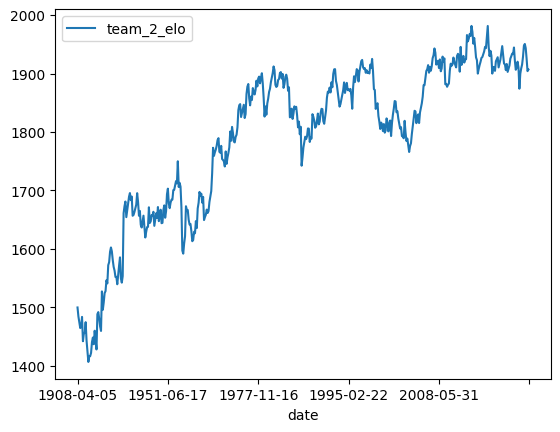

In [228]:
df[df["team_2"]=="Germany"].plot(x='date', y='team_2_elo')

<Axes: xlabel='team_1_time_diff', ylabel='team_1_elo'>

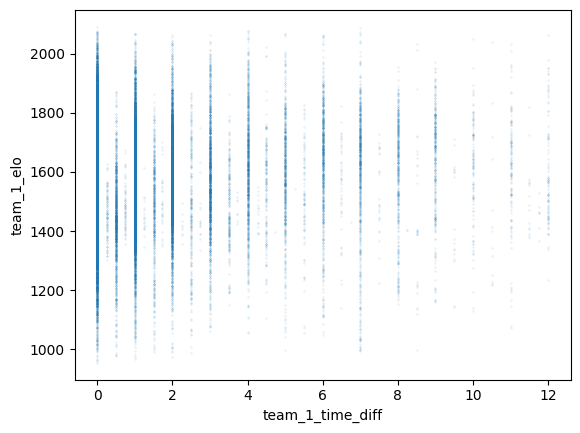

In [230]:
df.plot(x='team_1_time_diff', y='team_1_elo', kind='scatter', s=.05, alpha = .3)

In [242]:
econ = df[['team_1_gdp', 'team_2_gdp','p_score', 'team_1_time_diff', 'team_2_time_diff', 'team_1_elo', 'team_2_elo']].dropna()
econ['elo_effect'] = 1 / (1 + 10 ** ((econ['team_2_elo'] - econ['team_1_elo']) / 400))


In [243]:
econ.corr()

,team_1_gdp,team_2_gdp,p_score,team_1_time_diff,team_2_time_diff,team_1_elo,team_2_elo,elo_effect
team_1_gdp,1.000000,0.289021,0.040821,0.037665,0.080661,0.268471,0.208059,0.067740
team_2_gdp,0.289021,1.000000,-0.041205,0.070008,0.033291,0.210713,0.266475,-0.063674
p_score,0.040821,-0.041205,1.000000,-0.081923,0.075471,0.287603,-0.281202,0.538193
team_1_time_diff,0.037665,0.070008,-0.081923,1.000000,0.346417,0.050728,0.065255,-0.015427
team_2_time_diff,0.080661,0.033291,0.075471,0.346417,1.000000,0.057075,0.054328,0.004248
team_1_elo,0.268471,0.210713,0.287603,0.050728,0.057075,1.000000,0.447334,0.519182
team_2_elo,0.208059,0.266475,-0.281202,0.065255,0.054328,0.447334,1.000000,-0.514911
elo_effect,0.067740,-0.063674,0.538193,-0.015427,0.004248,0.519182,-0.514911,1.000000


In [245]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
# X = all the columns except p_score

X = econ[['team_1_time_diff', 'team_2_time_diff', 'team_1_gdp', 'team_2_gdp']]
X['team_1_gdp_sq'] = X['team_1_gdp'] ** 2
X['team_2_gdp_sq'] = X['team_2_gdp'] ** 2
X['elo_effect'] = econ['elo_effect']

# X['team_1_time_diff_sq'] = X['team_1_time_diff'] ** 2
# X['team_2_time_diff_sq'] = X['team_2_time_diff'] ** 2


# X['team_12_gdp'] = X['team_2_gdp'] * X['team_1_gdp']

y = econ['p_score']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
summary_df = model.summary2().tables[1]  # coefficients table
summary_df['P>|t|'] = summary_df['P>|t|'].apply(lambda x: f"{x:.3e}")
print(summary_df)

                         Coef.      Std.Err.          t      P>|t|  \
const             2.668570e-01  3.139132e-03  85.009806  0.000e+00   
team_1_time_diff -9.432421e-03  4.724126e-04 -19.966490  5.223e-88   
team_2_time_diff  9.411611e-03  4.753025e-04  19.801308  1.336e-86   
team_1_gdp        2.666992e-07  1.140966e-07   2.337486  1.942e-02   
team_2_gdp       -1.540258e-07  1.135860e-07  -1.356027  1.751e-01   
team_1_gdp_sq    -2.790974e-12  1.146326e-12  -2.434711  1.491e-02   
team_2_gdp_sq     1.188567e-12  1.145548e-12   1.037553  2.995e-01   
elo_effect        4.642167e-01  4.766074e-03  97.400235  0.000e+00   

                        [0.025        0.975]  
const             2.607041e-01  2.730099e-01  
team_1_time_diff -1.035838e-02 -8.506464e-03  
team_2_time_diff  8.479990e-03  1.034323e-02  
team_1_gdp        4.306313e-08  4.903352e-07  
team_2_gdp       -3.766611e-07  6.860954e-08  
team_1_gdp_sq    -5.037841e-12 -5.441065e-13  
team_2_gdp_sq    -1.056775e-12  3.433908

In [246]:
summary_df.to_latex()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [234]:
pvals = model.pvalues

# Print with higher precision
print(pvals.apply(lambda x: f"{x:.2e}"))

const               0.00e+00
team_1_time_diff    1.08e-97
team_2_time_diff    9.14e-78
team_1_gdp          1.90e-02
team_2_gdp          1.80e-01
team_1_gdp_sq       2.50e-02
team_2_gdp_sq       2.17e-01
elo_effect          0.00e+00
dtype: object


In [136]:
print(model.summary().tables[0].as_latex_tabular())  # Coefficients table

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &     p\_score     & \textbf{  R-squared:         } &     0.306   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.306   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     1580.   \\
\textbf{Date:}             & Thu, 20 Nov 2025 & \textbf{  Prob (F-statistic):} &     0.00    \\
\textbf{Time:}             &     13:54:08     & \textbf{  Log-Likelihood:    } &    10951.   \\
\textbf{No. Observations:} &       25045      & \textbf{  AIC:               } & -2.189e+04  \\
\textbf{Df Residuals:}     &       25037      & \textbf{  BIC:               } & -2.182e+04  \\
\textbf{Df Model:}         &           7      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
%\caption{OLS Regression Results}
\end{center}


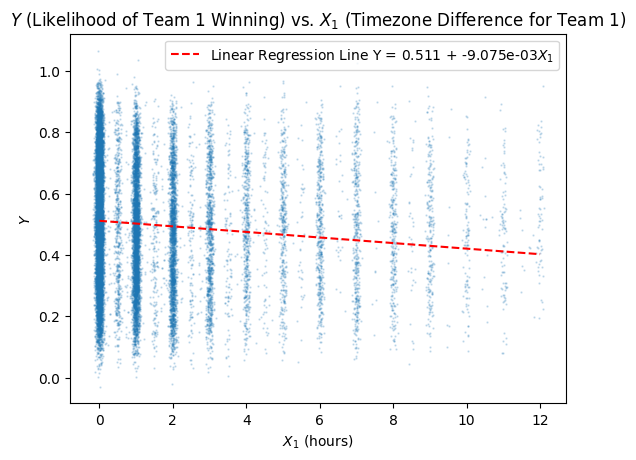

In [ ]:
import matplotlib.pyplot as plt
x = econ['team_1_time_diff']
y = econ['p_score']
x_j = x + np.random.normal(0, 0.05, size=len(x))
y_j = y + np.random.normal(0, 0.05, size=len(y))

plt.scatter(x_j, y_j, s=.5, alpha=0.2)
x_lin = np.linspace(x.min(), x.max(), 100)
sum_other_effects = 0
for col in X.columns:
    if col not in ['const', 'team_1_time_diff']:
        mean_val = X[col].mean()
        sum_other_effects += model.params[col] * mean_val
    
plt.plot(x_lin, model.params[0] + model.params[1]*x_lin + sum_other_effects, color='red', linestyle='--', label = 'Linear Regression Line Y = {:.3f} + {:.3e}$X_1$'.format(model.params[0] + sum_other_effects, model.params[1]))
# plt.grid(True)
plt.legend()
plt.xlabel('$X_1$ (hours)')
plt.ylabel('$Y$')
plt.title('$Y$ (Likelihood of Team 1 Winning) vs. $X_1$ (Timezone Difference for Team 1)')
plt.show()


In [205]:
def plot_with_jitter(ax, x, y, variable_of_interest,label, xlabel, ylabel, title):
    x_j = x + np.random.normal(0, 0.05, size=len(x))
    y_j = y + np.random.normal(0, 0.05, size=len(y))
    x_lin = np.linspace(x.min(), x.max(), 100)
    ax.scatter(x_j, y_j, s=.5, alpha=0.2)
    sum_other_effects = 0
    for col in X.columns:
        if col not in ['const', variable_of_interest]:
            mean_val = X[col].mean()
            sum_other_effects += model.params[col] * mean_val
        
    ax.plot(x_lin, model.params[0] + model.params[variable_of_interest]*x_lin + sum_other_effects, color='red', linestyle='--', label = 'LSRL Y = {:.3f} + {:.3e}{label}'.format(model.params[0] + sum_other_effects, model.params[variable_of_interest], label=label))
    ax.legend()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    
def plot_with_gdp_1_jitter(ax):
    variable_of_interest = 'team_1_gdp'
    x = econ['team_1_gdp']
    y = econ['p_score']
    x_lin = np.linspace(x.min(), x.max(), 100)
    x_j = x + np.random.normal(0, 0.05, size=len(x))
    y_j = y + np.random.normal(0, 0.05, size=len(y))
    ax.scatter(x_j, y_j, s=.5, alpha=0.2)
    sum_other_effects = 0
    for col in X.columns:
        if col not in ['const', variable_of_interest, 'team_1_gdp_sq']:
            mean_val = X[col].mean()
            sum_other_effects += model.params[col] * mean_val
        
    ax.plot(x_lin, model.params[0] + model.params[variable_of_interest]*x_lin + model.params['team_1_gdp_sq']* x_lin**2 + sum_other_effects, color='red', linestyle='--', label = 'LSRL Y = {:.3f} + {:.3e} $G_1$ + {:.3e} $G_1^2$'.format(model.params[0] + sum_other_effects, model.params[variable_of_interest],model.params['team_1_gdp_sq'] ))
    ax.legend()
    ax.set_xlabel("$G_1$ (\$/person)")
    ax.set_ylabel("$Y$")
    ax.set_title("$Y$ vs. $G_1$")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


def plot_with_gdp_2_jitter(ax):
    variable_of_interest = 'team_2_gdp'
    x = econ['team_2_gdp']
    y = econ['p_score']
    x_lin = np.linspace(x.min(), x.max(), 100)
    x_j = x + np.random.normal(0, 0.05, size=len(x))
    y_j = y + np.random.normal(0, 0.05, size=len(y))
    ax.scatter(x_j, y_j, s=.5, alpha=0.2)
    sum_other_effects = 0
    for col in X.columns:
        if col not in ['const', variable_of_interest, 'team_2_gdp_sq']:
            mean_val = X[col].mean()
            sum_other_effects += model.params[col] * mean_val
        
    ax.plot(x_lin, model.params[0] + model.params[variable_of_interest]*x_lin + model.params['team_2_gdp_sq']* x_lin**2 + sum_other_effects, color='red', linestyle='--', label = 'LSRL Y = {:.3f} + {:.3e} $G_2$ + {:.3e} $G_2^2$'.format(model.params[0] + sum_other_effects, model.params[variable_of_interest],model.params['team_2_gdp_sq'] ))
    ax.legend()
    ax.set_xlabel("$G_2$ (\$/person)")
    ax.set_ylabel("$Y$")
    ax.set_title("$Y$ vs. $G_2$")   
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)



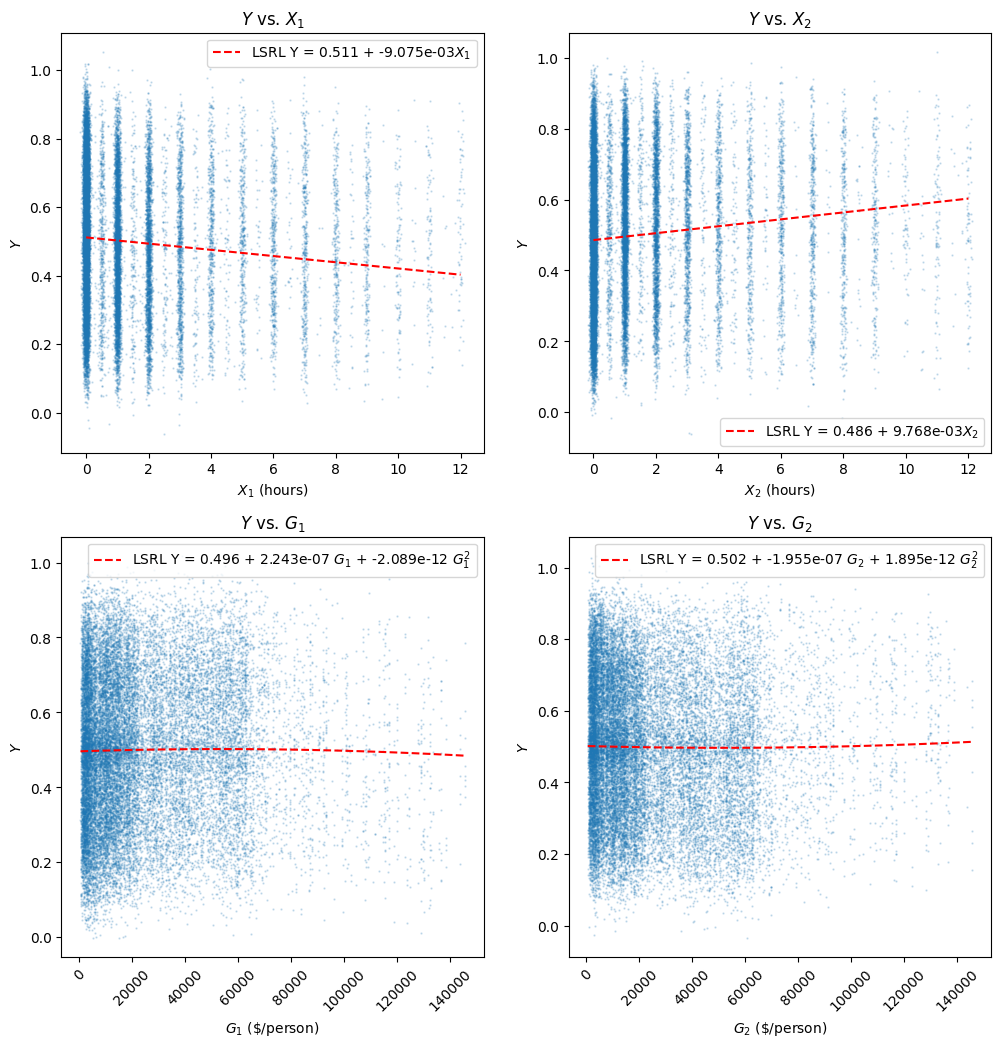

In [206]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

plot_with_jitter(
    axes[0, 0],
    econ['team_1_time_diff'],
    econ['p_score'],
    variable_of_interest='team_1_time_diff',
    label='$X_1$',
    xlabel='$X_1$ (hours)',
    ylabel='$Y$',
    title="$Y$ vs. $X_1$"
)

plot_with_jitter(
    axes[0, 1],
    econ['team_2_time_diff'],
    econ['p_score'],
    variable_of_interest='team_2_time_diff',
    label='$X_2$',
    xlabel='$X_2$ (hours)',
    ylabel='$Y$',
    title="$Y$ vs. $X_2$"
)

plot_with_gdp_1_jitter(axes[1, 0])
plot_with_gdp_2_jitter(axes[1, 1])
# bottom_ax = fig.add_axes([0.2, -0.05, 0.6, 0.3])  
# # [left, bottom, width, height] in figure coords (0–1)

# bottom_ax.plot([1, 2, 3])
# bottom_ax.set_title("Bottom Center Plot")

plt.show()

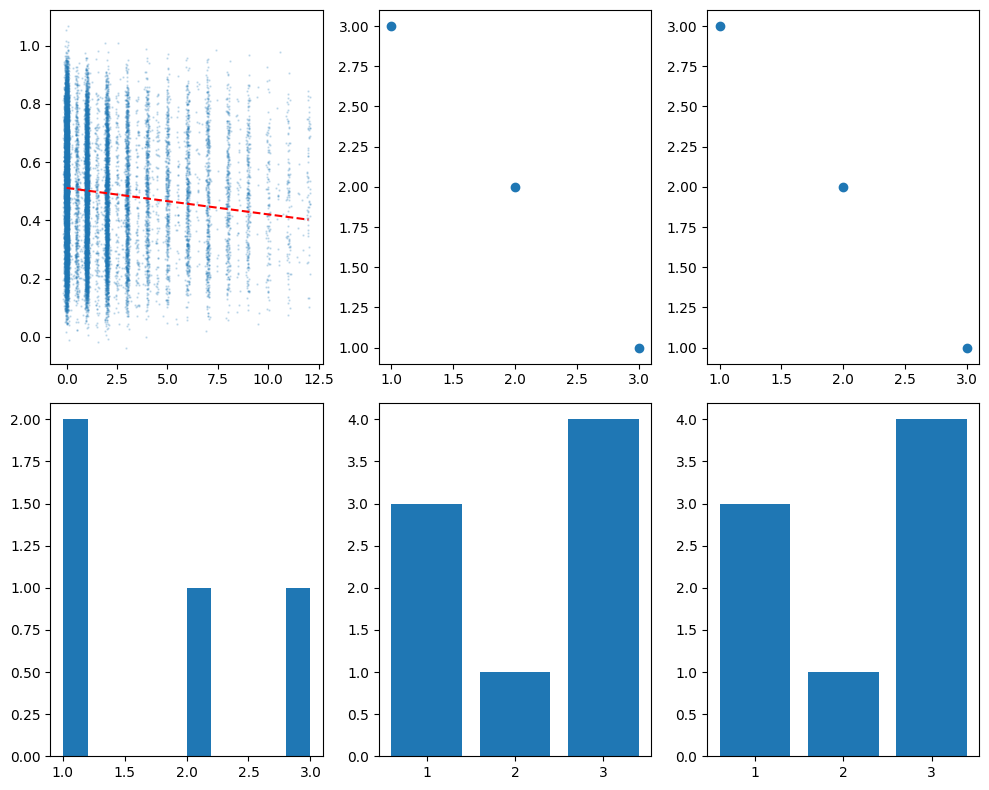

In [ ]:

fig, axes = plt.subplots(2, 3, figsize=(10, 8))

# time_diff_1
x = econ['team_1_time_diff']
y = econ['p_score']
x_j = x + np.random.normal(0, 0.05, size=len(x))
y_j = y + np.random.normal(0, 0.05, size=len(y))

axes[0,0].scatter(x_j, y_j, s=.5, alpha=0.2)
x_lin = np.linspace(x.min(), x.max(), 100)
sum_other_effects = 0
for col in X.columns:
    if col not in ['const', 'team_1_time_diff']:
        mean_val = X[col].mean()
        sum_other_effects += model.params[col] * mean_val
    
axes[0, 0].plot(x_lin, model.params[0] + model.params[1]*x_lin + sum_other_effects, color='red', linestyle='--', label = 'Linear Regression Line Y = {:.3f} + {:.3e}$X_1$'.format(model.params[0] + sum_other_effects, model.params[1]))

# time_diff_2
axes[1, 0].hist([1, 1, 2, 3])


axes[0, 1].scatter([1, 2, 3], [3, 2, 1])
axes[0, 2].scatter([1, 2, 3], [3, 2, 1])

axes[1, 1].bar([1, 2, 3], [3, 1, 4])
axes[1, 2].bar([1, 2, 3], [3, 1, 4])

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Actual p_score')

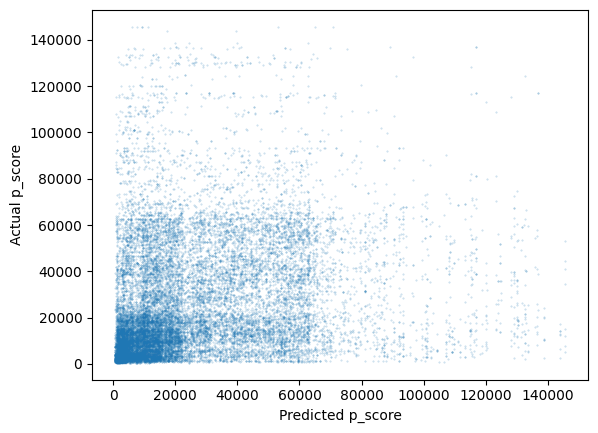

In [120]:
# graphing predicted vs actual
import matplotlib.pyplot as plt
# plt.scatter(econ['team_1_gdp'], y, s= .3, alpha=0.3)
plt.scatter(econ['team_1_gdp'], econ['team_2_gdp'], s= .15 ,alpha=0.3)

plt.xlabel("Predicted p_score")
plt.ylabel("Actual p_score")

In [107]:
#create an XGboost model to predict p_score
import xgboost as xgb
X = econ[['team_1_gdp', 'team_2_gdp', 'team_1_time_diff', 'team_2_time_diff','elo_effect']]
y = econ['p_score']

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# ----------------------------------------------------
# 1. Train / Test Split
# ----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------------------------------
# 2. Create the Regressor Model
# ----------------------------------------------------
model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    eval_metric='rmse'
)

# ----------------------------------------------------
# 3. Fit the Model
# ----------------------------------------------------
model.fit(X_train, y_train)

# ----------------------------------------------------
# 4. Predict + Metrics
# ----------------------------------------------------
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2:", r2)
print("MSE:", mse)


R^2: 0.3216599802815703
MSE: 0.024210613512906567


In [36]:
X = pd.DataFrame()
X['elo_effect'] = 1 / (1 + 10 ** ((econ['team_2_elo'] - econ['team_1_elo']) / 400))
# X['team_12_gdp'] = X['team_2_gdp'] * X['team_1_gdp']

y = econ['p_score']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                p_score   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     8979.
Date:                Wed, 19 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:46:19   Log-Likelihood:                 10210.
No. Observations:               25045   AIC:                        -2.042e+04
Df Residuals:                   25043   BIC:                        -2.040e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2562      0.003     93.538      0.0

<Axes: xlabel='elo_effect', ylabel='p_score'>

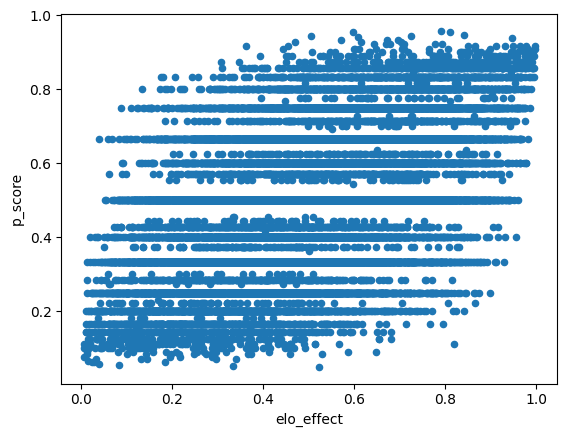

In [43]:
econ.plot('elo_effect', 'p_score', kind='scatter')

In [103]:
econ[['team_1_gdp', 'team_2_gdp','p_score', 'team_1_time_diff', 'team_2_time_diff', 'team_1_elo', 'team_2_elo', 'p_score']].corr()

,team_1_gdp,team_2_gdp,p_score,team_1_time_diff,team_2_time_diff,team_1_elo,team_2_elo,p_score
team_1_gdp,1.000000,0.289025,0.045162,0.034954,0.080858,0.272618,0.209126,0.045162
team_2_gdp,0.289025,1.000000,-0.036869,0.069799,0.036006,0.209649,0.262375,-0.036869
p_score,0.045162,-0.036869,1.000000,-0.072576,0.084820,0.274778,-0.293993,1.000000
team_1_time_diff,0.034954,0.069799,-0.072576,1.000000,0.346409,0.049467,0.056704,-0.072576
team_2_time_diff,0.080858,0.036006,0.084820,0.346409,1.000000,0.065624,0.055571,0.084820
team_1_elo,0.272618,0.209649,0.274778,0.049467,0.065624,1.000000,0.447308,0.274778
team_2_elo,0.209126,0.262375,-0.293993,0.056704,0.055571,0.447308,1.000000,-0.293993
p_score,0.045162,-0.036869,1.000000,-0.072576,0.084820,0.274778,-0.293993,1.000000


In [15]:
import matplotlib.pyplot as plt
plt.scatter(econ['team_1_gdp'], predictions, label='team 1 time diff', s =.5, c = 'r', alpha = .4)
plt.scatter(econ['team_1_gdp'], econ['p_score'], s =.5, c = 'b', alpha = .4)

NameError: name 'econ' is not defined

In [95]:
# X = econ[['team_1_gdp','team_2_gdp','team_1_time_diff','team_2_time_diff']]
X = pd.DataFrame()
X['gdp_diff'] = econ['team_1_gdp'] - econ['team_2_gdp']
X['time_diff'] = econ['team_1_time_diff'] - econ['team_2_time_diff']
X['gdp_diff_sq'] = X['gdp_diff'] ** 2
X['time_diff_sq'] = X['time_diff'] ** 2
y = econ['p_score']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                p_score   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     142.2
Date:                Wed, 19 Nov 2025   Prob (F-statistic):          1.87e-120
Time:                        01:21:25   Log-Likelihood:                 6651.0
No. Observations:               25045   AIC:                        -1.329e+04
Df Residuals:                   25040   BIC:                        -1.325e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5010      0.001    379.228   

1.454473946895588 9.110064018100752


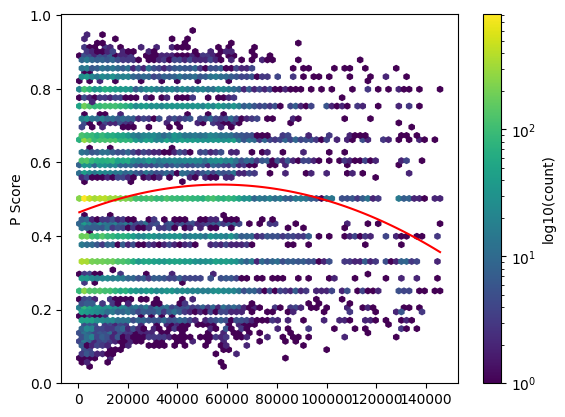

In [92]:
# graph the p_score with each predictor
import matplotlib.pyplot as plt
import seaborn as sns
X = econ['team_1_gdp']
gdp_1_mean = econ['team_1_gdp'].mean()
gdp_2_mean = econ['team_2_gdp'].mean()
gdp_2_sq_mean = econ['team_2_gdp_sq'].mean()

time_1_mean = econ['team_1_time_diff'].mean()
time_2_mean = econ['team_2_time_diff'].mean()
time_1_sq_mean = econ['team_1_time_diff_sq'].mean()
time_2_sq_mean = econ['team_2_time_diff_sq'].mean()
plt.hexbin(X, econ['p_score'], gridsize=70, cmap='viridis', bins='log')
plt.colorbar(label='log10(count)')
x_lin = np.linspace(X.min(), X.max(), 100)
plt.plot(x_lin, 
        model.params['team_1_gdp'] * x_lin + 
        model.params['team_1_gdp_sq'] * x_lin**2 +
        model.params['const'] + 
        model.params['team_2_gdp']* gdp_2_mean + 
        model.params['team_2_gdp_sq']* gdp_2_sq_mean +
        model.params['team_1_time_diff']*time_1_mean + 
        model.params['team_2_time_diff']*time_2_mean+
        model.params['team_1_time_diff_sq']*time_1_sq_mean+
        model.params['team_2_time_diff_sq']*time_2_sq_mean
         , 
         color='red')
# plt.xlabel('Team 1 GDP per Capita')
plt.ylabel('P Score')
# plt.xscale('log')
# plt.title('P Score vs Team 1 GDP per Capita')
print(time_1_mean, time_1_sq_mean)
plt.show()

Text(0.5, 1.0, 'Distrubtion of E[Y_hat]')

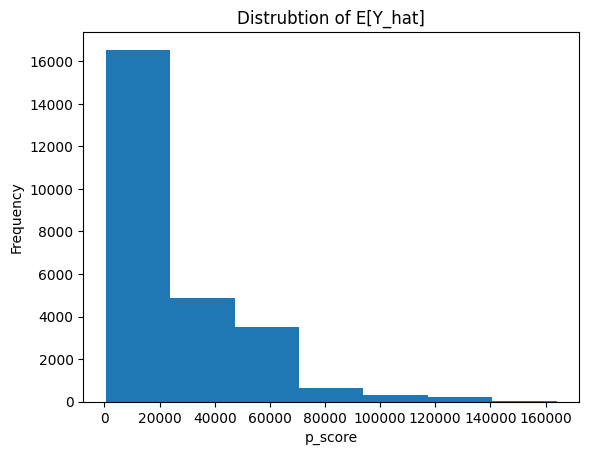

In [52]:
#plot a histogram of p_score
import matplotlib.pyplot as plt
plt.hist(df['team_2_gdp'], bins=7)
plt.xlabel('p_score')
plt.ylabel('Frequency')
plt.title('Distrubtion of E[Y_hat]')   


Text(0.5, 1.0, 'Distrubtion of E[Y_hat]')

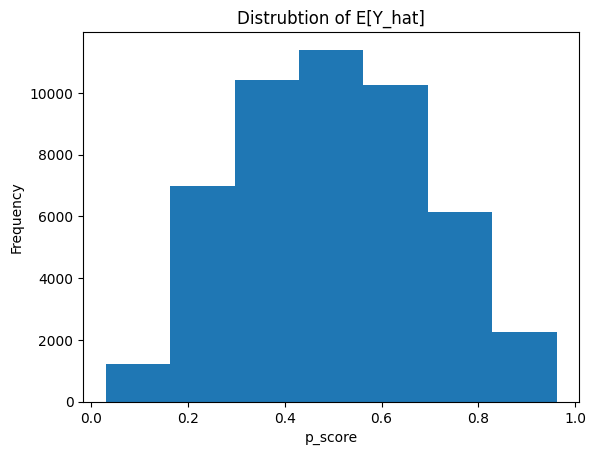

In [109]:
#plot a histogram of p_score
import matplotlib.pyplot as plt
plt.hist(df['p_score'], bins=7)
plt.xlabel('p_score')
plt.ylabel('Frequency')
plt.title('Distrubtion of E[Y_hat]')   


Text(0.5, 1.0, 'Histogram of Effective Time Zone Difference')

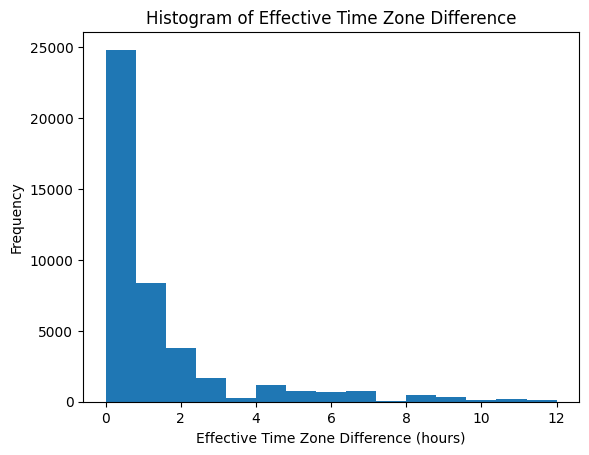

In [110]:
#plot a histogram of p_score
import matplotlib.pyplot as plt
plt.hist(df['team_1_time_diff'], bins=15)
plt.xlabel('Effective Time Zone Difference (hours)')
plt.ylabel('Frequency')
plt.title('Histogram of Effective Time Zone Difference')  

In [280]:
# linear regression on p_score and total_time_diff
import statsmodels.api as sm
X = df[['team_1_time_diff',"team_2_time_diff"]]#,"total_time_diff"]]
y = df['p_score']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                p_score   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     315.1
Date:                Tue, 18 Nov 2025   Prob (F-statistic):          1.03e-136
Time:                        19:45:29   Log-Likelihood:                 11172.
No. Observations:               48673   AIC:                        -2.234e+04
Df Residuals:                   48670   BIC:                        -2.231e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4990      0.001  

In [258]:
# linear regression on p_score and total_time_diff
import statsmodels.api as sm
X = df['total_time_diff']
y = df['p_score']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                p_score   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     629.2
Date:                Tue, 18 Nov 2025   Prob (F-statistic):          5.67e-138
Time:                        19:38:35   Log-Likelihood:                 11170.
No. Observations:               48673   AIC:                        -2.234e+04
Df Residuals:                   48671   BIC:                        -2.232e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4996      0.001    5

/var/folders/80/yg22fq6568d_n43d51ww65kr0000gn/T/ipykernel_64138/933530317.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(x_lin, model.params[0] + model.params[1]*x_lin, color='red', linestyle='--', label = 'Linear Regression Line y = {:.3f} + {:.3e}x'.format(model.params[0], model.params[1]))


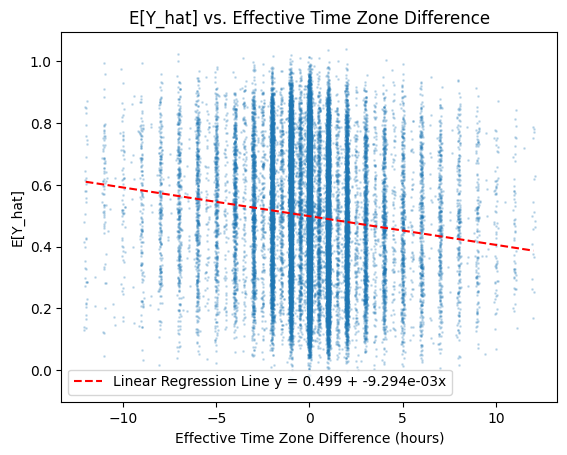

In [285]:
model.params

const               0.498971
team_1_time_diff   -0.009294
team_2_time_diff    0.008896
dtype: float64

In [286]:
# bin the data by total_time_diff and compute std of p_score in each bin

std_df = pd.DataFrame({})

for i in range(-12, 13):
    bin_lower = i
    bin_upper = i + 1
    bin_data = df[(df["total_time_diff"] >= bin_lower) & (df["total_time_diff"]< bin_upper)]
    if not bin_data.empty:
        std_df.loc[i,"mean_total_time_diff"] = (bin_data["total_time_diff"].mean())
        std_df.loc[i, "p_score_std"] = bin_data["p_score"].std()
        std_df.loc[i, "p_score_std_of_sample_std"] =  bin_data['p_score'].std(ddof=1) / ( (2*(len(bin_data)-1))**0.5 )
        std_df.loc[i, "num_samples"] = len(bin_data)



std_df.head(24)



,mean_total_time_diff,p_score_std,p_score_std_of_sample_std,num_samples
-12,-11.976744,0.208907,0.022794,43.0
-11,-10.966667,0.193913,0.015940,75.0
-10,-9.926056,0.200196,0.016920,71.0
-9,-8.973286,0.200253,0.011967,141.0
-8,-7.985106,0.185222,0.008562,235.0
-7,-6.973790,0.199877,0.007338,372.0
-6,-5.944668,0.199748,0.006045,547.0
-5,-4.923434,0.195958,0.006013,532.0
-4,-3.912806,0.191705,0.004748,816.0
-3,-2.901403,0.202896,0.004026,1271.0


In [287]:
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score

def exp_func(x, a, b):
    return a*x+b


x = std_df.dropna()['mean_total_time_diff'].values
y = std_df.dropna()['p_score_std'].values

params, cov = curve_fit(exp_func, x, y)

a, b= params
print("a =", a)
print("b =", b)
# print("c =", c)

y_pred = exp_func(x, a, b)

# metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Model: y = exp(bx)")
# print("a =", a)
# print("b =", b)
print("MSE =", mse)
print("R² =", r2)


a = -0.0006154099642006378
b = 0.19375727034432635
Model: y = exp(bx)
MSE = 5.8574348118695713e-05
R² = 0.2510358110494416


In [288]:
np.exp(b)

np.float64(1.2138016215464944)

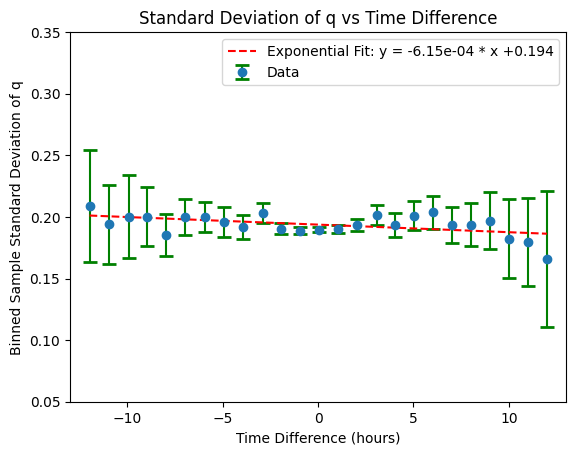

In [289]:
plt.errorbar(std_df["mean_total_time_diff"], std_df["p_score_std"], yerr=2*std_df["p_score_std_of_sample_std"], fmt='o', ecolor='g',  label="Data",  capsize=5, capthick=2)
plt.xlabel("Time Difference (hours)")
plt.ylabel("Binned Sample Standard Deviation of q")
plt.xlim(-13,13)
plt.ylim(.05,.35)
plt.title("Standard Deviation of q vs Time Difference")
# plot an expotential curve fit
x_fit = np.linspace(std_df["mean_total_time_diff"].min(),std_df["mean_total_time_diff"].max(),100)
y_fit = exp_func(x_fit, a, b)
plt.plot(x_fit, y_fit, color='red', label=f"Exponential Fit: y = {a:.2e} * x +{b:.3f}", linestyle='--')
plt.legend()
plt.show()

In [48]:
std_df.tail()

,mean_total_time_diff,p_score_std,p_score_std_of_sample_std
9,9.0,0.194569,0.056167
10,10.0,0.096225,0.048113
11,11.0,NaN,NaN
12,12.0,0.033672,0.023810
13,13.0,0.000000,0.000000


<Axes: xlabel='mean_total_time_diff', ylabel='p_score_std'>

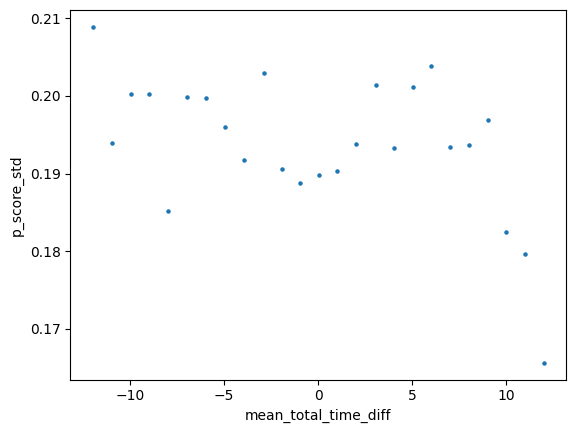

In [291]:
std_df.plot(x='mean_total_time_diff', y='p_score_std', kind='scatter', s=5)

In [292]:
# linear regression on p_score and total_time_diff
import statsmodels.api as sm
X = std_df[['mean_total_time_diff']]
y = std_df['p_score_std']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            p_score_std   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     7.709
Date:                Tue, 18 Nov 2025   Prob (F-statistic):             0.0107
Time:                        19:51:21   Log-Likelihood:                 86.342
No. Observations:                  25   AIC:                            -168.7
Df Residuals:                      23   BIC:                            -166.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1938 

In [41]:
from sklearn.linear_model import LinearRegression


X = std_df[["mean_total_time_diff"]]# 'mean_away_time_diff','mean_home_time_diff',"std_total_time_diff", 'std_away_time_diff','std_home_time_diff']]
y = std_df["p_score_std"]

model = LinearRegression().fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R²:", model.score(X, y))

ValueError: Input y contains NaN.

In [314]:
import pandas as pd
import numpy as np
  # your DataFrame
k = 100
N=1000

partitions=[]

for i in range(N):
  shuffled_df = df.sample(frac=1, random_state=None).reset_index(drop=True)
  partitions.append(shuffled_df.iloc[0:k])


In [315]:
std_df = pd.DataFrame(
    {})

In [326]:
for i, partition in enumerate(partitions):
    # print(partition["p_score"].std(ddof=1))   # sample std dev
    std_df.loc[i, "p_score_std"] = partition["odds"].std(ddof=1)
    # std_df.loc[i, "mean_total_time_diff"] = np.abs(partition["total_time_diff"].mean())
    # std_df.loc[i, "mean_home_time_diff"] = partition["home_time_diff"].mean().abs
    # std_df.loc[i, "mean_away_time_diff"] = partition["away_time_diff"].mean()
    std_df.loc[i, "std_total_time_diff"] = partition["total_time_diff"].std()
    std_df.loc[i, "std_home_time_diff"] = partition["home_time_diff"].std()
    std_df.loc[i, "std_away_time_diff"] = partition["away_time_diff"].std()



<Axes: xlabel='std_away_time_diff', ylabel='p_score_std'>

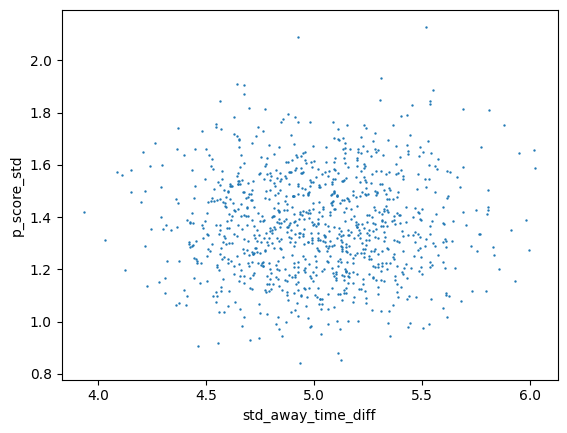

In [329]:
std_df.plot(x='std_away_time_diff', y='p_score_std', kind='scatter', s=.5)

In [325]:
from sklearn.linear_model import LinearRegression


X = std_df[["mean_total_time_diff"]]# 'mean_away_time_diff','mean_home_time_diff',"std_total_time_diff", 'std_away_time_diff','std_home_time_diff']]
y = std_df["p_score_std"]

model = LinearRegression().fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R²:", model.score(X, y))


Intercept: 1.3620132900335258
Coefficients: [0.02165041]
R²: 0.0010596779433842407
